In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("../data/ada.csv")

In [3]:
dataset

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2017-12-29,0.517300,1.080000,0.400004,1.000000,4.262042e+06,0.517300,1.080000,0.400004,1.000000,4.262042e+06,0.0,1.0
1,2017-12-30,0.590030,0.694139,0.420000,0.520000,2.496892e+07,0.590030,0.694139,0.420000,0.520000,2.496892e+07,0.0,1.0
2,2017-12-31,0.710000,0.740000,0.590020,0.590030,1.324840e+07,0.710000,0.740000,0.590020,0.590030,1.324840e+07,0.0,1.0
3,2018-01-01,0.702160,0.715000,0.632000,0.703400,1.380754e+07,0.702160,0.715000,0.632000,0.703400,1.380754e+07,0.0,1.0
4,2018-01-02,0.762000,0.800000,0.675020,0.704000,8.440669e+06,0.762000,0.800000,0.675020,0.704000,8.440669e+06,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,2021-04-27,1.306639,1.333633,1.223582,1.237973,4.791092e+08,1.306639,1.333633,1.223582,1.237973,4.791092e+08,0.0,1.0
1181,2021-04-28,1.337979,1.349051,1.233085,1.306617,4.717582e+08,1.337979,1.349051,1.233085,1.306617,4.717582e+08,0.0,1.0
1182,2021-04-29,1.306542,1.411739,1.266448,1.337613,6.828781e+08,1.306542,1.411739,1.266448,1.337613,6.828781e+08,0.0,1.0
1183,2021-04-30,1.353140,1.370994,1.285897,1.306601,3.870279e+08,1.353140,1.370994,1.285897,1.306601,3.870279e+08,0.0,1.0


In [4]:
data = copy.deepcopy(dataset)
data = data.drop(columns=['date', 'volume', 'adjClose', 'adjHigh','adjLow','adjOpen', 'adjVolume', 'divCash', 'splitFactor'], axis=1)


In [5]:
data

,close,high,low,open
0,0.517300,1.080000,0.400004,1.000000
1,0.590030,0.694139,0.420000,0.520000
2,0.710000,0.740000,0.590020,0.590030
3,0.702160,0.715000,0.632000,0.703400
4,0.762000,0.800000,0.675020,0.704000
...,...,...,...,...
1180,1.306639,1.333633,1.223582,1.237973
1181,1.337979,1.349051,1.233085,1.306617
1182,1.306542,1.411739,1.266448,1.337613
1183,1.353140,1.370994,1.285897,1.306601


In [6]:
if data.isnull().sum().sum() >0:
    data = data.fillna(method='pad') # filling null values with their previous
    print ('filled empty values')
else:
    print ('No empty values')

No empty values


# Feature Engineering


In [7]:
tek_ind_1 = copy.deepcopy(data)
tek_ind_2 = copy.deepcopy(data)

In [8]:
tek_ind_1

,close,high,low,open
0,0.517300,1.080000,0.400004,1.000000
1,0.590030,0.694139,0.420000,0.520000
2,0.710000,0.740000,0.590020,0.590030
3,0.702160,0.715000,0.632000,0.703400
4,0.762000,0.800000,0.675020,0.704000
...,...,...,...,...
1180,1.306639,1.333633,1.223582,1.237973
1181,1.337979,1.349051,1.233085,1.306617
1182,1.306542,1.411739,1.266448,1.337613
1183,1.353140,1.370994,1.285897,1.306601


In [13]:
    
def create_technical_indicators_set_1(data):

    data = _get_daily_return(data)
    data = _get_price_gap(data)
    data = _get_moving_average(data)
    data = _get_rsi(data)
    data = _get_R_precentage(data)
    data = _get_bollinger_bands(data)
    data = _get_exponential_ma(data)
    data = _get_momentum(data)
    return data


def _get_daily_return(data):
    # Percentage change between the current and a prior element
    data['daily_return'] = data.close.pct_change().fillna(0)
    
    # Cummulative Product (+1 is used not so we can ignore the 0s in the first couple rows)
    data['cum_daily_return'] = (1 + data['daily_return']).cumprod() 
    return data

def _get_price_gap(data):
    data['H-L'] = data.high - data.low
    data['C-O'] = data.close - data.open
    return data

def _get_moving_average(data):
    data['10day Ma'] = data.close.shift(1).rolling(window = 10).mean().fillna(0)
    data['50day Ma'] = data.close.shift(1).rolling(window = 50).mean().fillna(0)
    data['200day Ma'] = data.close.shift(1).rolling(window = 200).mean().fillna(0)
    
    data['ma7'] = data.close.rolling(window=7).mean().fillna(0)
    data['ma21'] = data.close.rolling(window=21).mean().fillna(0)
    
    # creating MA convergeance and divergence
    data['ema_26'] = data.close.ewm(span=26).mean().fillna(0)
    data['ema_12'] = data.close.ewm(span=12).mean().fillna(0)
    data['macd'] = (data['ema_12'] - data['ema_26'])
    
    return data
    

def _get_rsi(data):
    import talib
    data['rsi'] = talib.RSI(data.close.values, timeperiod = 14)
    return data

def _get_R_precentage(data):
    import talib
    data['R%'] = talib.WILLR(data.high.values, data.low.values, data.close.values,14)
    return data

def _get_bollinger_bands(data, window = 21,no_of_std =2):
    #calculate rolling mean and standard deviation using number of days set above
    rolling_mean = data.close.rolling(window).mean()
    rolling_std = data.close.rolling(window).std()
    #Create upper and lower Bollinger bands
    data['bb_high'] =(rolling_mean + (rolling_std * no_of_std)).fillna(0)
    data['bb_low'] =(rolling_mean - (rolling_std * no_of_std)).fillna(0)
    return data

def _get_exponential_ma(data):
    data['ema'] = data.close.ewm(com=0.5).mean()
    return data
def _get_momentum(data):
    data['momentum'] = data.close - 1
    return data

In [14]:
tek_ind_1 = create_technical_indicators_set_1(tek_ind_1)

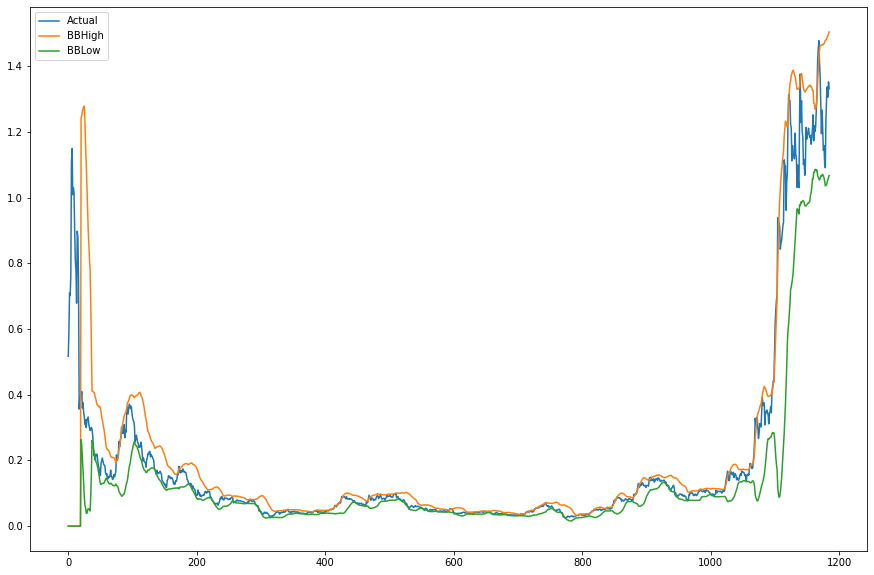

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(tek_ind_1['close'], label ='Actual')
plt.plot(tek_ind_1['bb_high'], label ='BBHigh')
plt.plot(tek_ind_1['bb_low'], label ='BBLow')
plt.legend(loc='best')

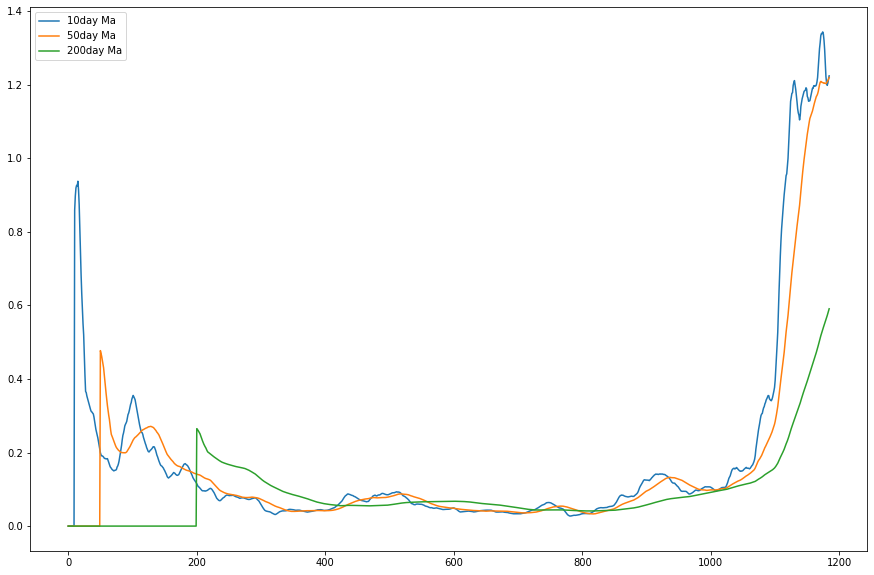

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(tek_ind_1['10day Ma'], label ='10day Ma')
plt.plot(tek_ind_1['50day Ma'], label ='50day Ma')
plt.plot(tek_ind_1['200day Ma'], label ='200day Ma')
plt.legend(loc='best')

In [ ]:
def prepare_data(data, lookback = 20):
    data = _check_null_values(data)
    values = pd.DataFrame(data.values.astype('float32'))
    values = _scale_data(values)
    values = _create_time_series(values)
    return values
    

def _check_null_values(data):
    if data.isnull().sum().sum() >0 :
        data = data.fillna(0) # filling null values with their previous
        print ('filled empty values')
    else:
        print ('No empty values')

def _scale_data(data):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

print(X.shape)
def _create_time_series(data, look_back=60, index_of_column_to_predict=0):
    temp = data.copy()
    temp["id"] = range(1, len(temp) +1)
    temp = temp.iloc[:look_back, :] # get all values before the lookback
    print (temp.head(1))
    print(temp.shape)
    temp.set_index('id', inplace = True)
    pred_value = data.copy()
    pred_value = pred_value.iloc[look_back:, index_of_column_to_predict]  # get all values before the lookback
    pred_value.columns = ["Pred"]

    pred_value = pd.DataFrame(pred_value)
    print(pred_value.head(1))
    print(pred_value.shape)
    pred_value["id"] =range(1, len(pred_value) +1 )
    pred_value.set_index('id', inplace = True)
    final_df =pd.concat([temp, pred_value], axis=1)
    return final_df


def _split_data(data_raw, lookback, testSize = 0.1):
#     data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
#     print (data[:4])
    data = np.array(data);
    test_set_size = int(np.round(testSize*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,-1]
    
    x_test = data[train_set_size:,:-1,:]
    y_test = data[train_set_size:,-1,-1]
    
    return [x_train, y_train, x_test, y_test]

In [25]:
data = prepare_data(tek_ind_1)
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(X, lookback)

# TensorFlow

## LSTM

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=75, return_sequences =True,input_shape=(x_train.shape[1], x_train.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units=30, return_sequences =True))
model_lstm.add(tf.keras.layers.LSTM(units=30, return_sequences =True))

model_lstm.add(tf.keras.layers.Dense(units=1))
model_lstm.compile(loss='mae', optimizer='adam')
model_lstm.summary()

history_lstm = model_lstm.fit(x_train, y_train, epochs =100, batch_size=32, validation_data =(x_test, y_test), shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 19, 75)            29400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 19, 30)            12720     
_________________________________________________________________
lstm_2 (LSTM)                (None, 19, 30)            7320      
_________________________________________________________________
dense (Dense)                (None, 19, 1)             31        
Total params: 49,471
Trainable params: 49,471
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 2s 52ms/step - loss: 0.0522 - val_loss: 0.4314
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0270 - val_loss: 0.4991
Epoch 3/100
33/33 [==============================]

33/33 [==============================] - 1s 18ms/step - loss: 0.0107 - val_loss: 0.4109
Epoch 74/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0105 - val_loss: 0.3852
Epoch 75/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0105 - val_loss: 0.4109
Epoch 76/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0104 - val_loss: 0.3832
Epoch 77/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0105 - val_loss: 0.4126
Epoch 78/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0104 - val_loss: 0.3852
Epoch 79/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0103 - val_loss: 0.4121
Epoch 80/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0103 - val_loss: 0.3853
Epoch 81/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0103 - val_loss: 0.4122
Epoch 82/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0102 - val_loss: 0.3870
Epo

In [27]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(history_lstm.history['loss'], label ='train_loss', color='red')
# plt.plot(history_lstm.history['val_loss'], label ='test_loss', color='blue')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend(loc='best')

In [28]:
x_test.shape

(116, 19, 22)

In [29]:
y_pred_tf_lstm = model_lstm.predict(x_test)

y_pred_tf_lstm = y_pred_tf_lstm[:, -1, 0]

In [30]:
y_test.shape

(116,)

In [31]:
y_pred_tf_lstm.shape

(116,)

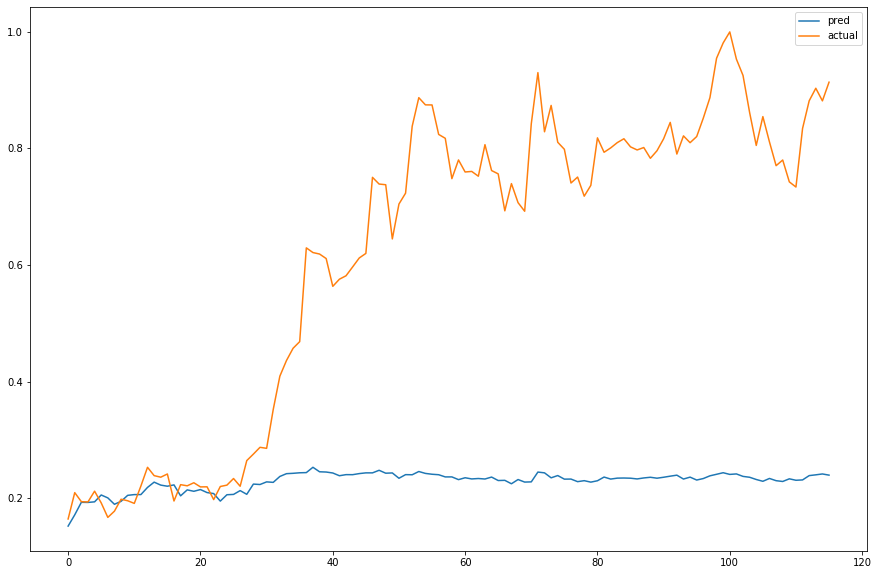

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(y_pred_tf_lstm, label ='pred')
plt.plot(y_test, label ='actual')
plt.legend(loc='best')

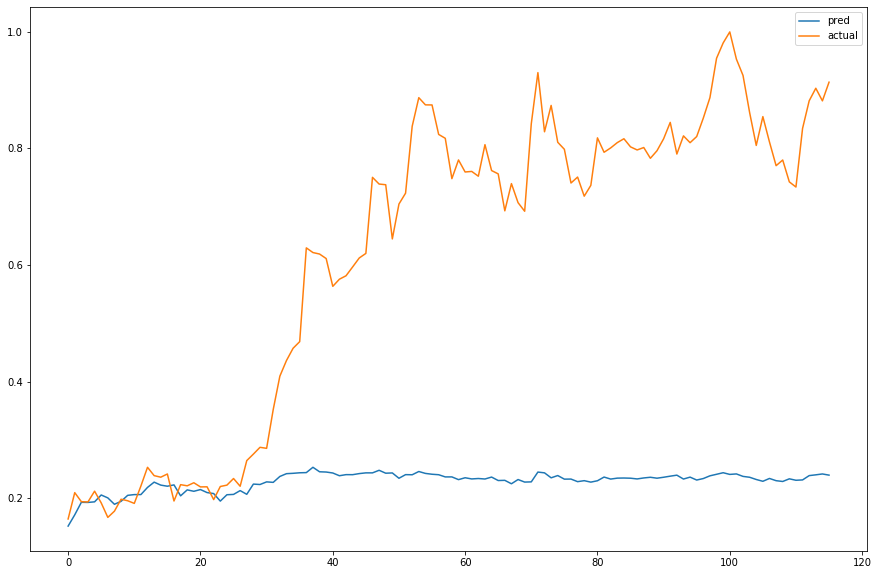

In [33]:
# smaller test size
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(y_pred_tf_lstm, label ='pred')
plt.plot(y_test, label ='actual')
plt.legend(loc='best')

## GRU


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_gru = tf.keras.Sequential()
model_gru.add(tf.keras.layers.GRU(units=75, return_sequences =True,input_shape=(x_train.shape[1], x_train.shape[2])))
model_gru.add(tf.keras.layers.GRU(units=30, return_sequences =True))
model_gru.add(tf.keras.layers.GRU(units=30))
model_gru.add(tf.keras.layers.Dense(units=1))

model_gru.compile(loss='mae', optimizer='adam')
model_gru.summary()

history_gru = model_gru.fit(x_train, y_train, epochs =100, batch_size=32, validation_data =(x_test, y_test), shuffle=False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 19, 75)            22275     
_________________________________________________________________
gru_1 (GRU)                  (None, 19, 30)            9630      
_________________________________________________________________
gru_2 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 37,516
Trainable params: 37,516
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 1s 45ms/step - loss: 0.0334 - val_loss: 0.4689
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0477 - val_loss: 0.4397
Epoch 3/100
33/33 [=============================

33/33 [==============================] - 1s 20ms/step - loss: 0.0044 - val_loss: 0.2211
Epoch 74/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0041 - val_loss: 0.2740
Epoch 75/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0048 - val_loss: 0.2772
Epoch 76/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0076 - val_loss: 0.2309
Epoch 77/100
33/33 [==============================] - 1s 23ms/step - loss: 0.0041 - val_loss: 0.2480
Epoch 78/100
33/33 [==============================] - 1s 26ms/step - loss: 0.0041 - val_loss: 0.2425
Epoch 79/100
33/33 [==============================] - 1s 25ms/step - loss: 0.0044 - val_loss: 0.2417
Epoch 80/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0035 - val_loss: 0.2966
Epoch 81/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0051 - val_loss: 0.2499
Epoch 82/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0049 - val_loss: 0.2004
Epo

In [35]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(history_gru.history['loss'], label ='train_loss', color='red')
# plt.plot(history_gru.history['val_loss'], label ='test_loss', color='blue')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend(loc='best')

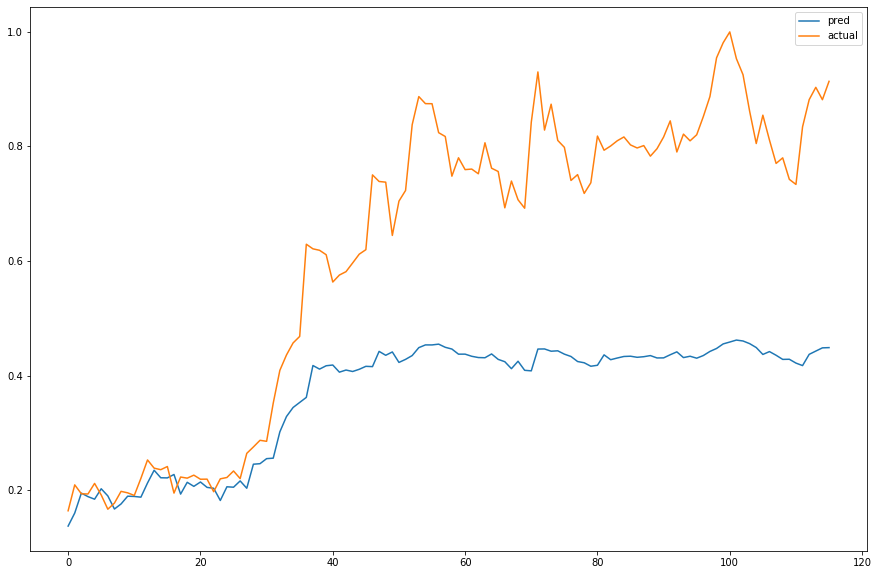

In [36]:
y_pred_tf_gru = model_gru.predict(x_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(y_pred_tf_gru, label ='pred')
plt.plot(y_test, label ='actual')
plt.legend(loc='best')

In [37]:
# scaler.scale_
# normal_scale = 1/5.21225901e-05

# y_pred = y_pred * normal_scale
# y_test = y_test * normal_scale

# mean_y_test = y_test.mean()
# mean_y_pred = y_pred.mean()

# print(mean_y_test, mean_y_pred)
# accuracy = round((mean_y_test/mean_y_pred )*100, 2)
# accuracy

In [38]:
# X_train.shape

In [39]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(1049, 19, 22)
(1049,)
(116, 19, 22)
(116,)


# Pytorch

In [40]:
input_dim = 22
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [41]:
import torch
import torch.nn as nn

x_train_gru = torch.from_numpy(x_train).type(torch.Tensor)
x_test_gru = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


In [42]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [43]:
model_pt_gru = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model_pt_gru.parameters(), lr=0.01)

In [44]:
import time
hist = np.zeros(num_epochs)

for t in range(num_epochs):
    y_train_pred = model_pt_gru(x_train_lstm)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "Mean Squared Error: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time

NameError: name 'x_train_lstm' is not defined

In [ ]:
y_pred_pt_gru = model_pt_gru(x_test_lstm)


In [ ]:
y_pred_pt_gru.detach().numpy()

In [ ]:
y_test_gru

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(y_pred_pt_gru.detach().numpy(), label ='pred')
plt.plot(y_test_gru, label ='actual')
plt.legend(loc='best')